In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/data.csv
/kaggle/input/notebookfaed49fbcc/__results__.html
/kaggle/input/notebookfaed49fbcc/__notebook__.ipynb
/kaggle/input/notebookfaed49fbcc/__output__.json
/kaggle/input/notebookfaed49fbcc/custom.css
/kaggle/input/notebookfaed49fbcc/__results___files/__results___18_1.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___16_2.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___19_0.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___10_4.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___13_2.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___10_3.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___18_2.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___16_0.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___13_1.png
/kaggle/input/notebookfaed49fbcc/__results___files/__results___10_2.png
/kaggle/input/notebookfaed49fbcc/__resul

# **import important libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from pprint import pprint
from matplotlib import pyplot
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# **Import dataset**

In [3]:
import os

# Specify the directory of your dataset
dataset_directory = '/kaggle/input/breast-cancer-dataset'

# Walk through the specified directory and print file paths
for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-dataset/data.csv


# **Read dataset as data frame**

In [4]:
import pandas as pd

# Load a CSV file from the dataset directory
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/data.csv')

# Display the first few rows of the DataFrame
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# **Data statistics**

In [5]:
import pandas as pd

# Load the dataset


# Drop the unnecessary columns for statistics calculation
columns_to_drop = ['Unnamed: 32', 'id', 'diagnosis', 'KMeans_Cluster', 'Hierarchical_Cluster']
data_clean = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Basic statistics
basic_stats = data_clean.describe().T  # Transpose for better readability

# Additional statistics: median, variance, skewness, and kurtosis
additional_stats = data_clean.agg(['median', 'var', 'skew', 'kurt']).T

# Combine basic and additional statistics
stats_summary = pd.concat([basic_stats, additional_stats], axis=1)

# Rename columns for better understanding
stats_summary.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median', 'variance', 'skewness', 'kurtosis']

# Display the summary statistics
print(stats_summary)


                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

# **Data set clustering using K means and Hirarchical clustering**

Columns in the dataset: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


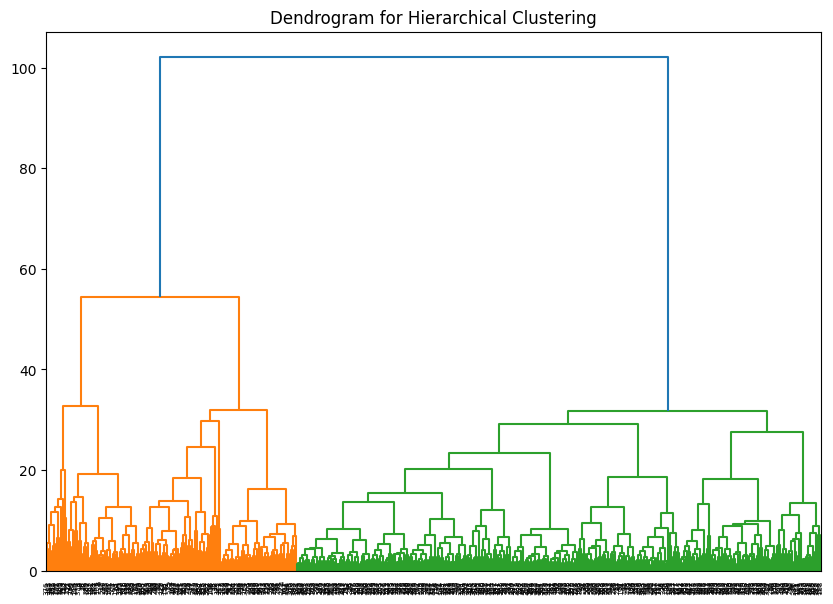

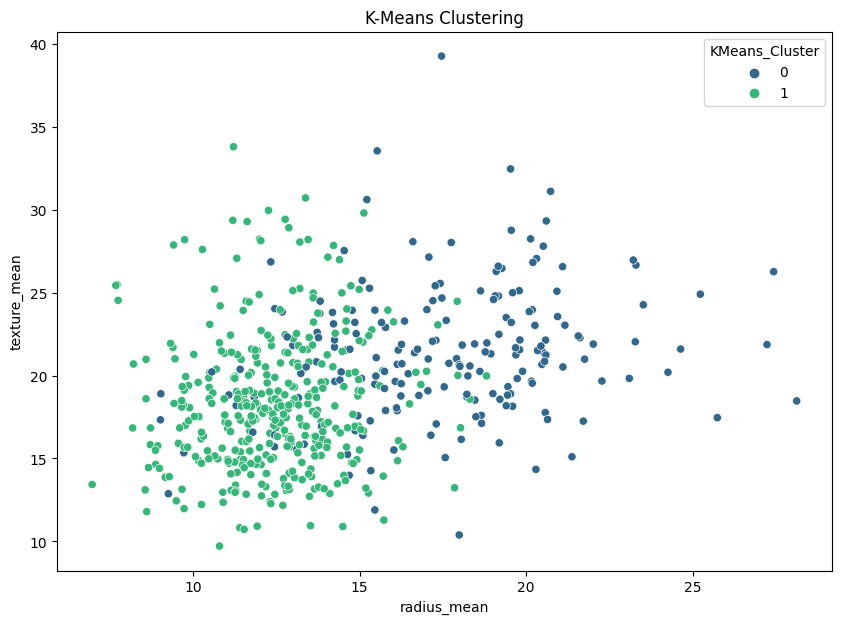

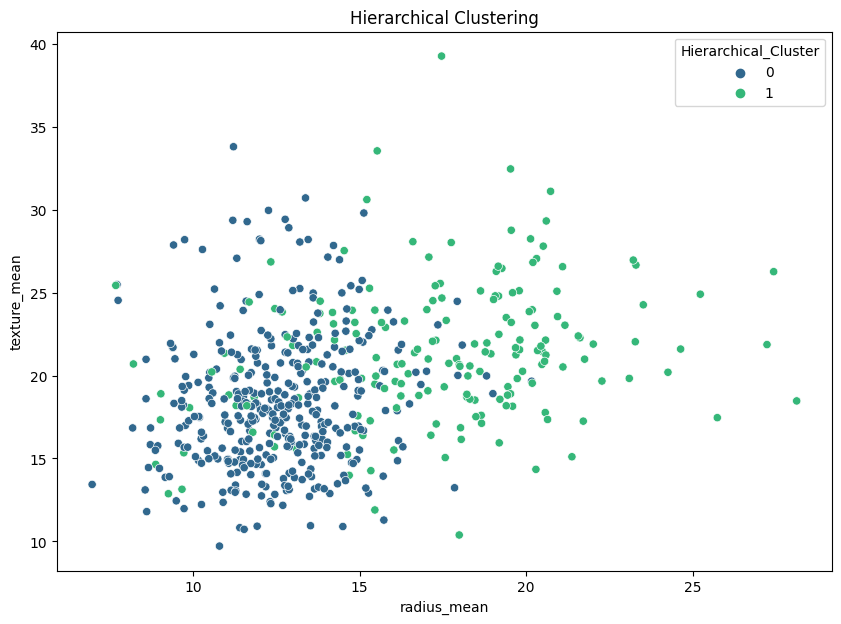

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/data.csv')

# Print the column names to inspect them
print("Columns in the dataset:", data.columns)

# Drop the unnecessary column
data = data.drop(columns=['Unnamed: 32', 'id'])

# Drop rows with missing values
data = data.dropna()

# Encode the categorical variable 'diagnosis'
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features
X = data.drop(columns=['diagnosis'])

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
data['KMeans_Cluster'] = kmeans_labels

# Hierarchical Clustering
linked = linkage(X_scaled, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Assign cluster labels based on hierarchical clustering
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linked, 2, criterion='maxclust')

# Add the hierarchical cluster labels to the dataframe
data['Hierarchical_Cluster'] = hierarchical_labels - 1  # subtract 1 to make it 0 and 1

# Visualization of K-Means Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualization of Hierarchical Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='Hierarchical_Cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()


# **Decision Tree Algorithm**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder





# Encode the categorical variable 'diagnosis'
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9385964912280702
Confusion Matrix:
[[68  3]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



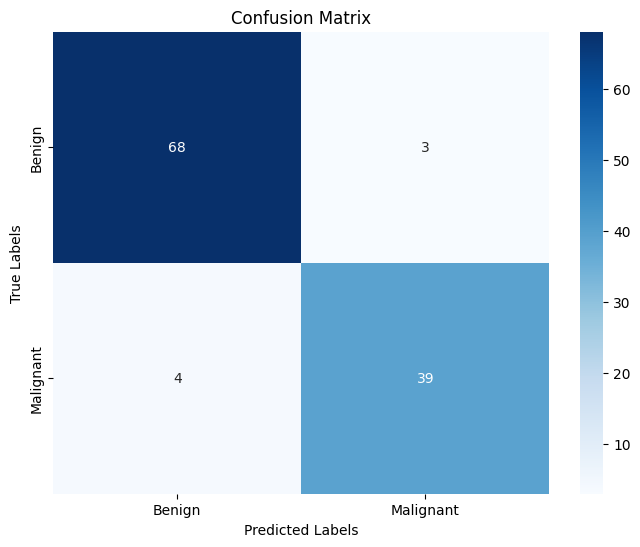

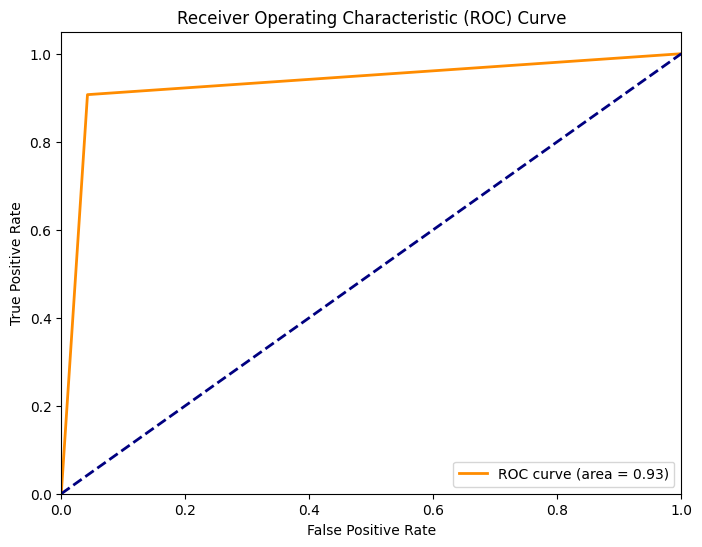

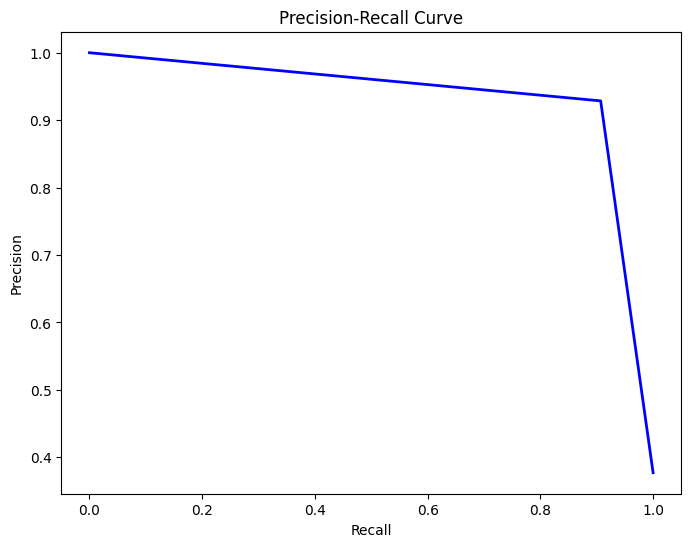

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **K-Nearest Neighbors (KNN) Algorithm**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder



# Encode the categorical variable 'diagnosis'
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Display the results
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)


Accuracy: 0.956140350877193
Confusion Matrix:
 [[71  0]
 [ 5 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



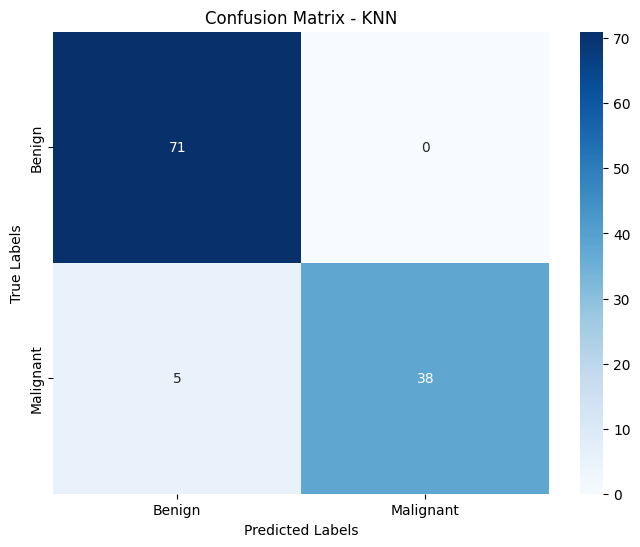

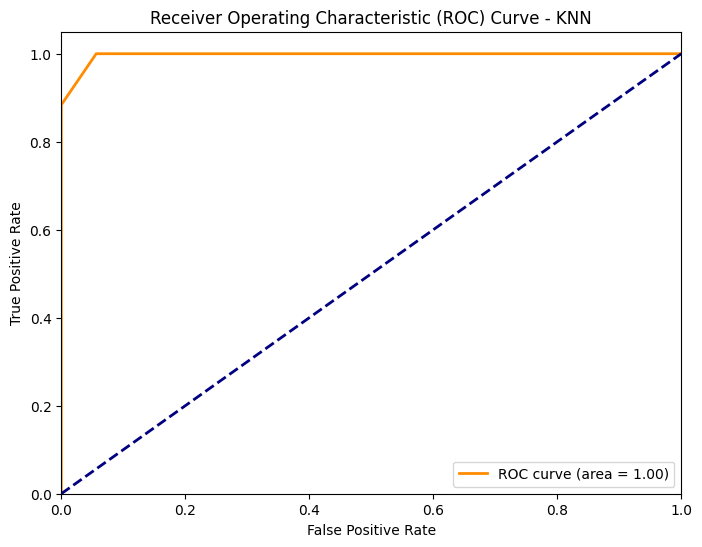

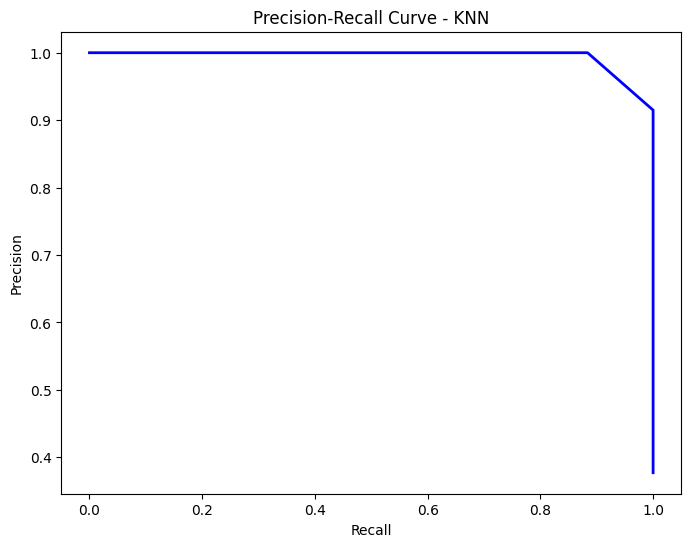

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Calculate ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.show()


# **Support Vector Machine (SVM) Algorithm**

Accuracy: 0.9473684210526315
Confusion Matrix:
[[71  0]
 [ 6 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC: 0.9934490664919751


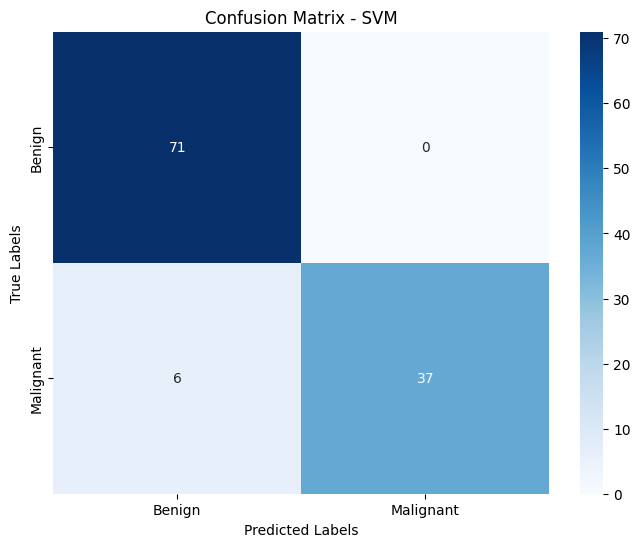

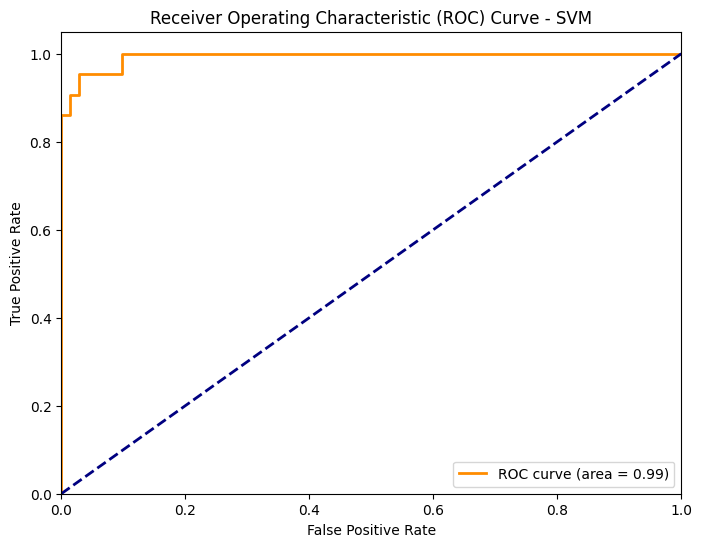

In [11]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train the SVM model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)

# Calculate ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Print the results
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report_svm)
print(f"AUC: {roc_auc_svm}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()


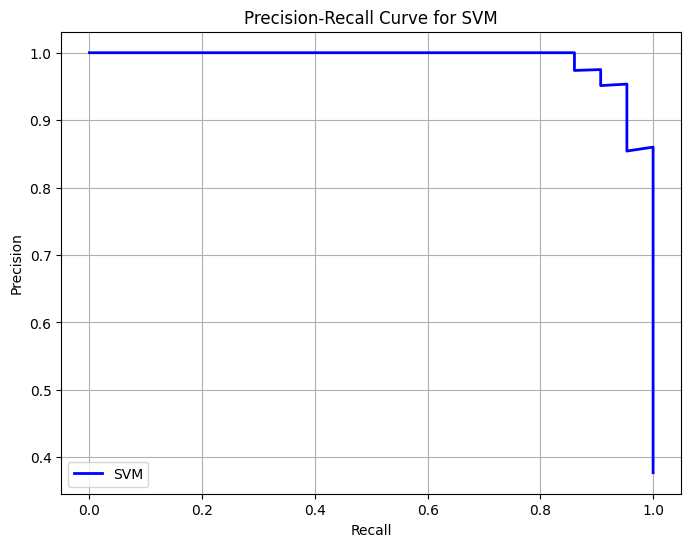

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_svm)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# **Comparison of performance between three algorithms:**

When predicting breast cancer using Decision Tree (DT), K-Nearest Neighbors (KNN), and 
Support Vector Machine (SVM) algorithms, each model demonstrates strong performance, but 
30
with nuanced differences. The accuracy for DT and SVM stands at 94.74%, while KNN slightly 
edges out with an accuracy of 95.61%. In terms of precision and recall, DT showcases a 
balanced performance with high values for both benign and malignant cases. Specifically, the 
DT achieves a precision of 0.96 and recall of 0.96 for benign cases, and 0.93 precision and 
recall for malignant cases, indicating a well-rounded ability to correctly classify both classes 
with few errors. KNN, on the other hand, exhibits a perfect precision of 1.00 for malignant 
cases but a slightly lower recall of 0.88, suggesting it is highly accurate in its positive 
predictions but occasionally misses true positives. The SVM model excels with a perfect 
precision of 1.00 for malignant cases and a recall of 0.86, indicating it is particularly effective 
at ensuring that its positive classifications are correct, albeit with a slight tendency to miss 
some true positive cases.
Moreover, the models' performance is further distinguished by their ROC and Precision-Recall 
curves. SVM achieves the highest AUC of 0.993, underscoring its superior ability to distinguish 
between benign and malignant cases across different threshold values. This high AUC, 
combined with strong precision-recall metrics, positions SVM as the top performer in terms of 
overall predictive capability. The ROC and Precision-Recall curves provide a visual 
confirmation of these results, illustrating the trade-offs between precision and recall for each 
model. While KNN and SVM show robustness in minimizing false positives, DT maintains a 
balanced approach with consistently high metrics across the board. Ultimately, the choice of 
model may hinge on specific clinical priorities, such as whether the emphasis is on reducing 
false negatives (favoring DT’s balanced approach) or ensuring the highest possible precision 
in positive predictions (favoring SVM and KNN). Each model’s unique strengths offer valuable 
options for effective breast cancer prediction, depending on the particular needs of the 
healthcare setting.
The SVM model performs best overall, with a perfect precision for malignant cases, strong 
recall, and the highest AUC (0.993), indicating superior ability to distinguish between classes 
and minimize false positives, making it the most reliable for breast cancer prediction.
